# 01 - Data Exploration & Preprocessing

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load dataset
df = pd.read_csv("../data/Fraud.csv")# Display first rows
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [38]:

# Shape of dataset
print("Dataset shape:", df.shape)

Dataset shape: (6362620, 11)


In [39]:
# Check data types and missing values
print("\nData types:\n", df.dtypes)


Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [40]:

print("\nMissing values:\n", df.isnull().sum())


Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


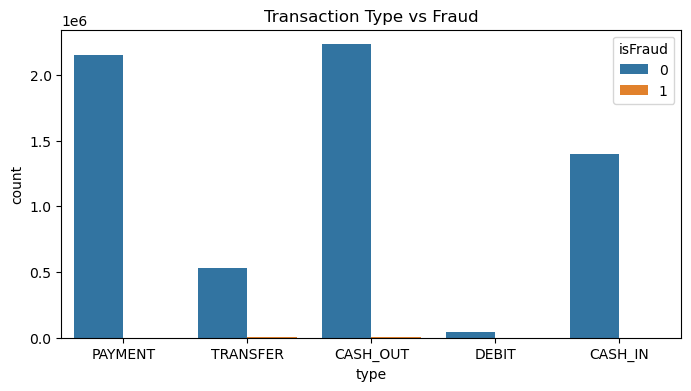

In [41]:
# Fraud by transaction type
plt.figure(figsize=(8,4))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs Fraud')
plt.show()

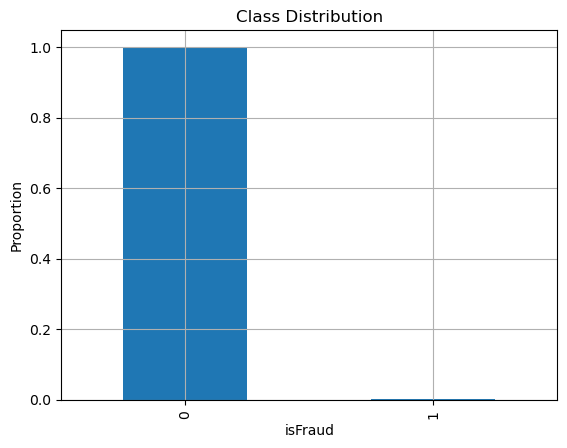

In [42]:
# Value counts for target
df['isFraud'].value_counts(normalize=True).plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('isFraud')
plt.ylabel('Proportion')
plt.grid()
plt.show()


In [43]:
# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())



Summary Statistics:

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.0000

In [44]:
# Drop columns not useful for modeling
cols_to_drop = ['nameOrig', 'nameDest']
df.drop(columns=cols_to_drop, inplace=True)

# Convert 'type' to one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

correlation = df.corr()


In [45]:
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

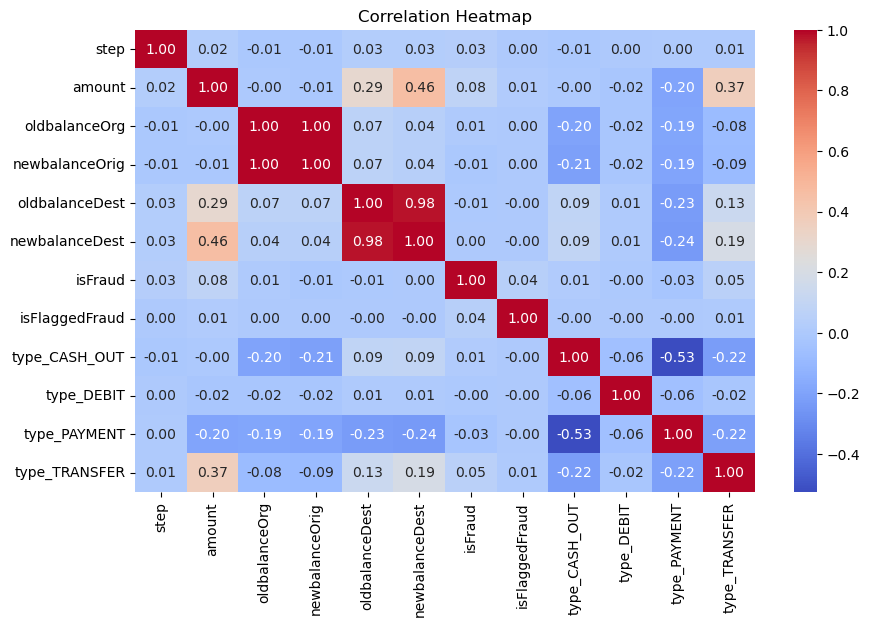

In [46]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Save preprocessed data
df.to_csv("../data/processed_fraud.csv", index=False)
print(f"\nPreprocessed data saved to: ../data/processed_fraud.csv")


Preprocessed data saved to: ../data/processed_fraud.csv


In [48]:
# display the new refactor data

df = pd.read_csv("../data/processed_fraud.csv")
display(df.head())


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False
